In [850]:
!pip3 install ucimlrepo


In [851]:
import pandas as pd

from ucimlrepo import fetch_ucirepo 
  

# fetch dataset 
credit_approval = fetch_ucirepo(id=27) 
  
# data (as pandas dataframes) 
X = credit_approval.data.features 
y = credit_approval.data.targets 

X.shape, y.shape

((690, 15), (690, 1))

In [852]:
Data = X
Data["Target"] = y
Data['Target'] =  Data['Target'].map({'+':1, '-':0})

Data.head()


,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Target
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b,1
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a,1
2,824,280.0,g,f,0,f,t,1.50,h,q,g,u,0.500,24.50,a,1
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b,1
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b,1


In [853]:
Data['Target'].value_counts()

Target
0    383
1    307
Name: count, dtype: int64

In [854]:
Data.drop(columns=["Target"], axis=1)
for column in Data.columns:
    if(Data[column].dtype == 'object'):
        Data[column] = Data[column].fillna(Data[column].mode()[0])
    else:
        Data[column] = Data[column].fillna(Data[column].mean())


In [855]:
Data.isnull().sum()

A15       0
A14       0
A13       0
A12       0
A11       0
A10       0
A9        0
A8        0
A7        0
A6        0
A5        0
A4        0
A3        0
A2        0
A1        0
Target    0
dtype: int64

In [856]:
import seaborn as sns
import matplotlib.pyplot as plt

# columns = ['A14', 'A7', 'A6', 'A5','A4', 'A3', 'A2', 'A1']

def plotHistogramForAll():
    plt.figure(figsize=(15,15))
    count = 1
    for col in Data.columns:
        plt.subplot(5,5,count)
        sns.histplot(Data[col], bins=50, kde=True)
        count+=1
#
    plt.tight_layout()
    plt.show()



In [857]:
Data.dtypes

A15         int64
A14       float64
A13        object
A12        object
A11         int64
A10        object
A9         object
A8        float64
A7         object
A6         object
A5         object
A4         object
A3        float64
A2        float64
A1         object
Target      int64
dtype: object

In [858]:
numerical_columns = Data.select_dtypes(include=["number","int64","float64"]).columns

skew_values = Data[numerical_columns].skew()

print(skew_values)
 

A15       13.140655
A14        2.749907
A11        5.152520
A8         2.891330
A3         1.488813
A2         1.155943
Target     0.222122
dtype: float64


In [859]:
for skew_col in skew_values.index:
     
    if(skew_values[skew_col] > 0.5): #Right Skew
      Data[skew_col] =  np.log1p(Data[skew_col])
    else:
      Data[skew_col] = np.power(Data[skew_col], 2)
      print(skew_col, skew_values[skew_col])

Target 0.22212157058948015


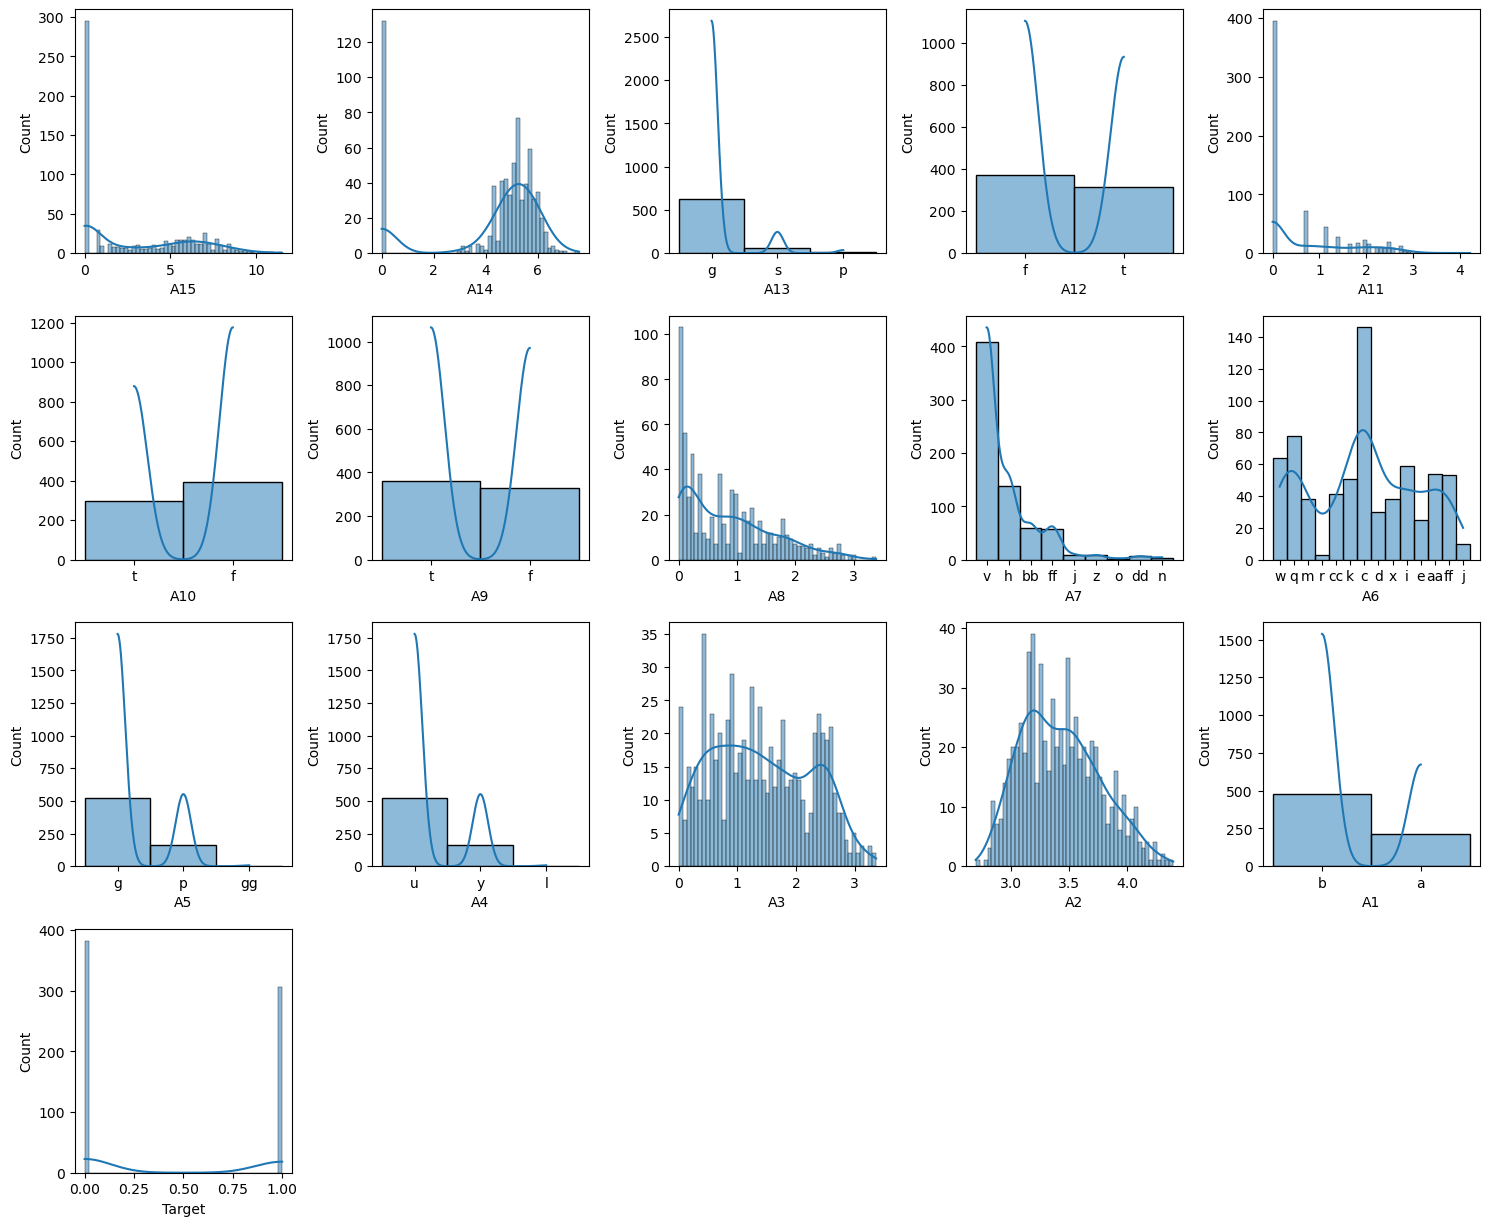

In [860]:
plotHistogramForAll()

In [861]:
Data.isnull().sum()

A15       0
A14       0
A13       0
A12       0
A11       0
A10       0
A9        0
A8        0
A7        0
A6        0
A5        0
A4        0
A3        0
A2        0
A1        0
Target    0
dtype: int64

In [862]:
Data.head()

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Target
0,0.000000,5.313206,g,f,0.693147,t,t,0.810930,v,w,g,u,0.000000,3.460409,b,1
1,6.329721,3.784190,g,f,1.945910,t,t,1.396245,h,q,g,u,1.697449,4.088829,a,1
2,6.715383,5.638355,g,f,0.000000,f,t,0.916291,h,q,g,u,0.405465,3.238678,a,1
3,1.386294,4.615121,g,t,1.791759,t,t,1.558145,v,w,g,u,0.932164,3.361417,b,1
4,0.000000,4.795791,s,f,0.000000,f,t,0.996949,v,w,g,u,1.890850,3.052585,b,1


In [863]:
categorical_columns = Data.select_dtypes(include="object").columns
categorical_columns

Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object')

In [864]:
Data_Encoded = pd.get_dummies(Data, columns=categorical_columns, drop_first=True).astype(int)
Data_Encoded['Target']

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Target, Length: 690, dtype: int32

In [865]:
Data.head()

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Target
0,0.000000,5.313206,g,f,0.693147,t,t,0.810930,v,w,g,u,0.000000,3.460409,b,1
1,6.329721,3.784190,g,f,1.945910,t,t,1.396245,h,q,g,u,1.697449,4.088829,a,1
2,6.715383,5.638355,g,f,0.000000,f,t,0.916291,h,q,g,u,0.405465,3.238678,a,1
3,1.386294,4.615121,g,t,1.791759,t,t,1.558145,v,w,g,u,0.932164,3.361417,b,1
4,0.000000,4.795791,s,f,0.000000,f,t,0.996949,v,w,g,u,1.890850,3.052585,b,1


<Axes: >

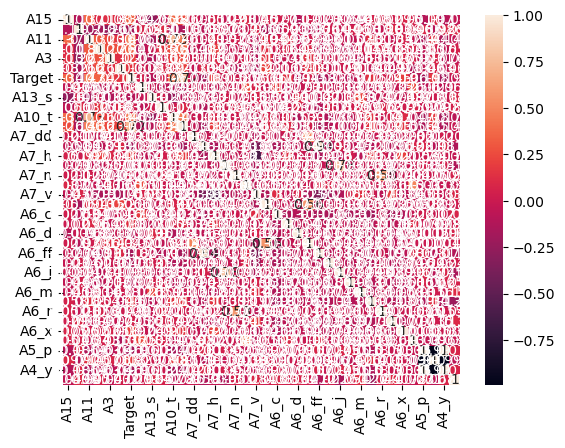

In [866]:
sns.heatmap(Data_Encoded.corr(), annot=True)

In [867]:
data_corr_threshold = 0.9

columns = set()

data_corr_matrix= Data_Encoded.corr()

data_corrs_abs = Data_Encoded.corr().abs()

for i  in range(len(data_corr_matrix.columns)):
    for j in range(i):
       if data_corr_matrix.iloc[i,j] > data_corr_threshold:
           col_name = data_corr_matrix.columns[i]
           columns.add(col_name)

print(columns)

Data_Encoded.drop(columns=columns, inplace=True)

{'A6_ff', 'A4_y'}


In [868]:
Data_Encoded.shape

(690, 36)

In [869]:
Data_Encoded['Target']

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Target, Length: 690, dtype: int32

<Axes: >

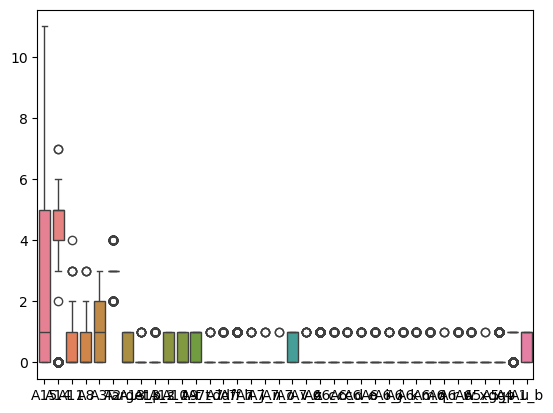

In [870]:
sns.boxplot(Data_Encoded)

In [871]:
# Q1 = Data_Encoded.quantile(0.25)
# Q3 = Data_Encoded.quantile(0.75)

# IQR = Q3 - Q1

# lower_bound = Q1 - 3*IQR
# upper_bound = Q3 + 3*IQR

# Data_Encoded = Data_Encoded[~((Data_Encoded < lower_bound) | (Data_Encoded > upper_bound)).any(axis=1)]


In [872]:
Data_Encoded.shape

(690, 36)

<Axes: >

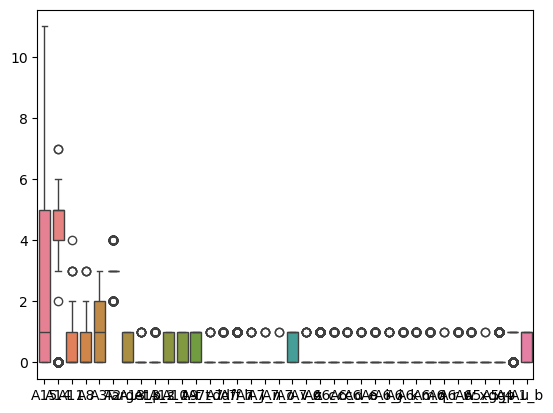

In [873]:
sns.boxplot(Data_Encoded)

In [874]:
pre_target = Data_Encoded['Target']
Data_Encoded.drop(columns=['Target'], axis=1, inplace=True)
pre_columns =Data_Encoded.columns



In [875]:
pre_columns

Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2', 'A13_p', 'A13_s', 'A12_t',
       'A10_t', 'A9_t', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o',
       'A7_v', 'A7_z', 'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_i', 'A6_j', 'A6_k',
       'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A5_gg', 'A5_p', 'A4_u',
       'A1_b'],
      dtype='object')

In [876]:
Data_Encoded.head()

,A15,A14,A11,A8,A3,A2,A13_p,A13_s,A12_t,A10_t,...,A6_k,A6_m,A6_q,A6_r,A6_w,A6_x,A5_gg,A5_p,A4_u,A1_b
0,0,5,0,0,0,3,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1,6,3,1,1,1,4,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,6,5,0,0,0,3,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,4,1,1,0,3,0,0,1,1,...,0,0,0,0,1,0,0,0,1,1
4,0,4,0,0,1,3,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1


In [877]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

scaled_array = standard_scaler.fit_transform(Data_Encoded)


In [878]:
df_scaled = pd.DataFrame(scaled_array, columns=pre_columns)

In [879]:
df_scaled.head()

,A15,A14,A11,A8,A3,A2,A13_p,A13_s,A12_t,A10_t,...,A6_k,A6_m,A6_q,A6_r,A6_w,A6_x,A5_gg,A5_p,A4_u,A1_b
0,-0.890094,0.601991,-0.628185,-0.690274,-1.103366,0.074155,-0.108306,-0.300079,-0.919195,1.157144,...,-0.282511,-0.241417,-0.357003,-0.066082,3.127499,-0.241417,-0.053916,-0.556146,0.560612,0.661438
1,1.110444,-0.417331,0.705500,0.802795,0.082495,2.632520,-0.108306,-0.300079,-0.919195,1.157144,...,-0.282511,-0.241417,2.801099,-0.066082,-0.319744,-0.241417,-0.053916,-0.556146,0.560612,-1.511858
2,1.110444,0.601991,-0.628185,-0.690274,-1.103366,0.074155,-0.108306,-0.300079,-0.919195,-0.864196,...,-0.282511,-0.241417,2.801099,-0.066082,-0.319744,-0.241417,-0.053916,-0.556146,0.560612,-1.511858
3,-0.556671,0.092330,0.705500,0.802795,-1.103366,0.074155,-0.108306,-0.300079,1.087908,1.157144,...,-0.282511,-0.241417,-0.357003,-0.066082,3.127499,-0.241417,-0.053916,-0.556146,0.560612,0.661438
4,-0.890094,0.092330,-0.628185,-0.690274,0.082495,0.074155,-0.108306,3.332456,-0.919195,-0.864196,...,-0.282511,-0.241417,-0.357003,-0.066082,3.127499,-0.241417,-0.053916,-0.556146,0.560612,0.661438


In [880]:
Data_Encoded = pd.concat([df_scaled, pre_target.reset_index(drop=True)], axis=1)

In [891]:
Data_Encoded.columns

Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2', 'A13_p', 'A13_s', 'A12_t',
       'A10_t', 'A9_t', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o',
       'A7_v', 'A7_z', 'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_i', 'A6_j', 'A6_k',
       'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A5_gg', 'A5_p', 'A4_u', 'A1_b',
       'Target'],
      dtype='object')

<Axes: >

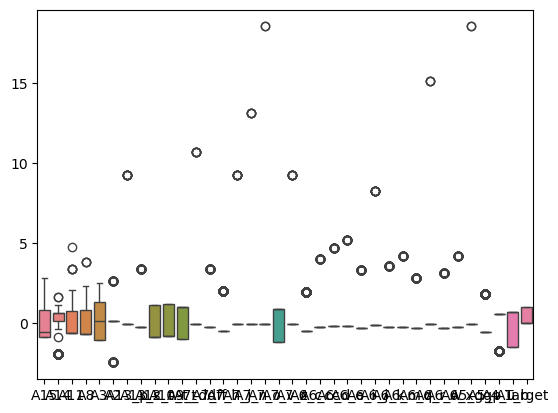

In [881]:
sns.boxplot(Data_Encoded)

In [882]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "KNearest Neighbours": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}




In [883]:
pre_columns.shape

(35,)

In [898]:
Data_Encoded['Target']

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Target, Length: 690, dtype: int32

In [899]:
x = Data_Encoded.drop(columns=["Target"], axis =1)
y = Data_Encoded['Target']

x.shape, y.shape

((690, 35), (690,))

In [900]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int32

In [901]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((483, 35), (207, 35), (483,), (207,))

In [902]:
def fit_and_score(name, model,x_train, x_test, y_train, y_test):
  print(f"model is {name} and shape is {x_train.shape}, {x_test.shape} {y_train.shape} {y_test.shape}")
  model.fit(x_train, y_train)
  score = model.score(x_test, y_test)
  print(f"score of {name} is {score}")
  

In [903]:
y_train.head()

178    1
265    0
352    0
529    0
409    0
Name: Target, dtype: int32

In [904]:
x_train.head()

,A15,A14,A11,A8,A3,A2,A13_p,A13_s,A12_t,A10_t,...,A6_k,A6_m,A6_q,A6_r,A6_w,A6_x,A5_gg,A5_p,A4_u,A1_b
178,1.110444,0.092330,0.705500,-0.690274,1.268356,-2.484209,-0.108306,-0.300079,-0.919195,1.157144,...,-0.282511,-0.241417,2.801099,-0.066082,-0.319744,-0.241417,-0.053916,-0.556146,0.560612,-1.511858
265,1.110444,0.092330,-0.628185,-0.690274,-1.103366,-2.484209,-0.108306,-0.300079,-0.919195,-0.864196,...,-0.282511,-0.241417,-0.357003,-0.066082,-0.319744,-0.241417,-0.053916,1.798090,-1.783765,0.661438
352,1.777289,-1.946314,-0.628185,-0.690274,1.268356,0.074155,-0.108306,-0.300079,1.087908,-0.864196,...,-0.282511,4.142209,-0.357003,-0.066082,-0.319744,-0.241417,-0.053916,1.798090,-1.783765,0.661438
529,0.443598,1.111652,-0.628185,-0.690274,2.454217,0.074155,-0.108306,-0.300079,-0.919195,1.157144,...,-0.282511,-0.241417,2.801099,-0.066082,-0.319744,-0.241417,-0.053916,-0.556146,0.560612,0.661438
409,-0.223248,0.601991,0.705500,-0.690274,-1.103366,-2.484209,-0.108306,-0.300079,-0.919195,1.157144,...,-0.282511,-0.241417,2.801099,-0.066082,-0.319744,-0.241417,-0.053916,-0.556146,0.560612,0.661438


In [ ]:
for name, model in models.items():
    fit_and_score(name, model, x_train, x_test, y_train, y_test)

model is Logistic Regression and shape is (483, 35), (207, 35) (483,) (207,)
score of Logistic Regression is 0.8357487922705314
model is KNearest Neighbours and shape is (483, 35), (207, 35) (483,) (207,)
score of KNearest Neighbours is 0.8067632850241546
model is Random Forest Classifier and shape is (483, 35), (207, 35) (483,) (207,)
score of Random Forest Classifier is 0.8743961352657005


In [911]:
from sklearn.model_selection import RandomizedSearchCV

def find_best_randomized_cv_params(name,model,params, x_train, y_train,x_test, y_test):
 
    randomSearch = RandomizedSearchCV(
        model(),
        param_distributions=params,
        cv=5,
    )

    randomSearch.fit(x_train, y_train)
    randomSearch.score(x_test, y_test)

    print(f"Model is {name} and params are {randomSearch.best_params_}")


    

In [909]:
from scipy.stats import loguniform
from scipy.stats import randint

knn_params = {
    'n_neighbors': np.arange(1,20),
    'weights' : ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

logistic_params  ={
    'C': loguniform(1e-4, 1e4),  # Continuous distribution for regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],  # Optimizers
    'max_iter': [100, 200, 300, 500],  # Iterations for convergence
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],  # Tolerance for stopping criteria
    'class_weight': ['balanced', None]  # Handling class imbalance
}

random_forest_params  = {
    'n_estimators': randint(50, 300),  # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],  # Tree depth
    'min_samples_split': randint(2, 10),  # Minimum samples to split
    'min_samples_leaf': randint(1, 10),  # Minimum samples per leaf
    'max_features': ['auto', 'sqrt', 'log2'],  # Features considered for split
    'bootstrap': [True, False],  # Sampling method
    'criterion': ['gini', 'entropy'],  # Splitting criterion
}





In [912]:
find_best_randomized_cv_params('Knn',KNeighborsClassifier,knn_params,x_train, y_train, x_test, y_test)

Model is Knn and params are {'weights': 'distance', 'n_neighbors': 16, 'metric': 'manhattan'}


In [913]:
find_best_randomized_cv_params('Logstic Regression',LogisticRegression,logistic_params,x_train, y_train, x_test, y_test)

Model is Logstic Regression and params are {'C': 0.23057785252030666, 'class_weight': None, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.1}


c:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\sande\anaconda3\Lib\site-packages\

In [914]:
find_best_randomized_cv_params('RandomForest',RandomForestClassifier,random_forest_params,x_train, y_train, x_test, y_test)

c:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\sande\anaconda3\Lib\site-packages\

Model is RandomForest and params are {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 280}


Model is Knn and params are {'weights': 'distance', 'n_neighbors': 16, 'metric': 'manhattan'}

Model is Logstic Regression and params are {'C': 0.23057785252030666, 'class_weight': None, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.1}

Model is RandomForest and params are {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 280}

In [916]:
knn_ = KNeighborsClassifier(n_neighbors=16, weights='distance', metric='manhattan')
knn_.fit(x_train, y_train)
knn_.score(x_test, y_test)

0.821256038647343

In [917]:
logistic_ = LogisticRegression(C= 0.23057785252030666, class_weight= None, max_iter= 200, penalty= 'l2', solver= 'saga', tol= 0.1)
logistic_.fit(x_train, y_train)
logistic_.score(x_test, y_test)

0.8309178743961353

In [922]:
random_forest_= RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_depth= 40, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 9, n_estimators= 280)
random_forest_.fit(x_train, y_train)
random_forest_.score(x_test, y_test)

0.8599033816425121

In [925]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score

In [930]:
def metric_scores_(model,x_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    print(f"Model is {name} and details are  accuracy: {accuracy}, precision:{precision}, recall:{recall}, f1:{f1}, confusion:{confusion}")

In [931]:
metric_scores_(knn_, x_test)

Model is Random Forest Classifier and details are  accuracy: 0.821256038647343, precision:0.875, recall:0.7216494845360825, f1:0.7909604519774012, confusion:[[100  10]
 [ 27  70]]


In [932]:
metric_scores_(logistic_, x_test)

Model is Random Forest Classifier and details are  accuracy: 0.8309178743961353, precision:0.803921568627451, recall:0.845360824742268, f1:0.8241206030150754, confusion:[[90 20]
 [15 82]]


In [933]:
metric_scores_(random_forest_, x_test)

Model is Random Forest Classifier and details are  accuracy: 0.8599033816425121, precision:0.8541666666666666, recall:0.845360824742268, f1:0.8497409326424871, confusion:[[96 14]
 [15 82]]


In [935]:
import joblib

joblib.dump(random_forest_, "randomforest_classifer")

['randomforest_classifer']

In [936]:
mod = joblib.load('randomforest_classifer')
predict = mod.predict(x_test)
predict

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1])